# Mohammad Farhaj Miah Coursework 1

## Introduction

### Defining the problem

My input data will be from the IMDB dataset. This dataset consists of 50000 highly polarised textual movie reviews labeled positive/negative. It will be split into two sets, with 25000 samples for the training set and 25000 samples for the testing set. Each set has 50% positive and 50% negative reviews. The input data will be structured into elements which are made up of two variables, labels and text. I will be trying to predict whether the worded reviews are positive or negative. To do this I will be downloading the top 10000 most frequent words. With this, I believe the available data is sufficient to solve this problem because the data contains predictive information. Rare words will be represented with a ?. This is a binary classification problem as there were only two classes for the model to learn to categorize between. This means the optimum loss function should be binary-crossentropy, although I will be testing different loss functions and comparing results. As it is a binary classification problem, my models will end with a single unit layer with sigmoid activation.

Early hypothesis:

 - The output can be predicted given the inputs
 
 - The available data is sufficiently informative to learn the relationship between inputs and outputs

### Measure of success

For this problem, the measure of success is graded by the accuracy of the result. The accuracy will be calculated by the ratio: number of correct predictions/total number of input samples, so my model will be optimizing the accuracy. A low loss quantity will also represent success. However, when scaling the model I will be focusing on the loss to identify when the model overfits.

### Deciding the Evaluation protocol

The evaluation protocol I am choosing is the hold-out validation set. I am choosing this because the IMDB dataset is big enough to provide reliable results without the use of K-Fold validation. To use hold-out validation, a seperate validation set was comprised of the first 10000 reviews from the training set, while the partial training set was made up of the remaining 15000 reviews from the training set.

## Methodology

### Preparing the data

This code is used to prepare and load the data set. As stated in the introduction, only 10000 of the most frequently used words are kept, as shown with 'num_words=10000'.

train_data - data that will be used to train the model
test_data = data that will be used to test the model

train_labels and test_labels will represent whether a review is negative or positive, with 0s and 1s.

x_val and y_val - validation set containing 10000 samples. Used to validate the models progress

partial_x_train and partial_y_train - contains 15000 samples and is used to train the network

To prepare the data, we need to format it in a way that can be fed into a machine-learning model. To do this, the data should be formatted into tensors. This means the values should be scaled to small values such as floating-point numbers. To do this we can use one-hot encoding.

In [2]:
# Code from DLWP
from keras.datasets import imdb
import numpy as np

# Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# load the IMDB dataset
((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

# This is the vectorized training and test data. The vectorized data then being assigned to x_train and x_test
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# This is the vectorized labels. Being vectorized as the float32 data type
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

17473536/17464789 [==============================] - 0s 0us/step


This code one-hot encodes the samples and converts the layers to floating-point value tensors by turning them into vectors of 0s and 1s. Check comments of code to see assignments of data. This is how a sample looks now.

In [4]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Now we are ready to train models.

### Building the first model

For our first model, the goal is to do better than the baseline. For IMDB the baseline is an accuracy of 50%. For this problem, I will be using Dense layers. This is because Dense layers can perform well with input data of vectors and labels of scalars.

To start, I have decided to use 1 intermediate layer with 8 hidden units and a final layer that will output the scalar prediction regarding the sentiment of the current review. The first intermediate layer will use Relu activation and the final layer will use sigmoid activation, so it can output a probability.

Because we are facing a binary classification problem and the output of the network is a probability, it's best to use the binary-crossentropy loss function. The optimizer I will be using is rmsprop with the default learning rate.

I will be creating a validation set by setting apart 10000 samples from the original training data. This is so the network is always working with data it has never seen before for more accurate results.

I will be training the model for 20 epochs in mini-batches of 512 samples

After each model I will be plotting graphs on both loss and accuracy.

In [3]:
# Code from DLWP book with my own adjustments
from keras import models
from keras import layers

# The model definition, adding layers
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

# Compiling the model with a loss function and an optimizer
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 49ms/step - loss: 0.5077 - accuracy: 0.7871 - val_loss: 0.3940 - val_accuracy: 0.8720
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3229 - accuracy: 0.9032 - val_loss: 0.3266 - val_accuracy: 0.8835
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2523 - accuracy: 0.9243 - val_loss: 0.2979 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2090 - accuracy: 0.9395 - val_loss: 0.2812 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1800 - accuracy: 0.9465 - val_loss: 0.2783 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1573 - accuracy: 0.9557 - val_loss: 0.2751 - val_accuracy: 0.8895
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1385 - accuracy: 0.9610 - val_loss: 0.2907 - val_accuracy: 0.8808
Epoch 8/20
30

In [6]:
# History contains data from the training. It is used to retrieve the keys.
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

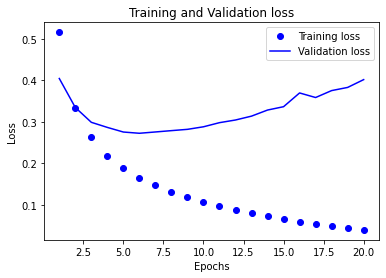

In [7]:
import matplotlib.pyplot as plt

# This code is from the DLWP Book   
def plot_loss():

    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
plot_loss()

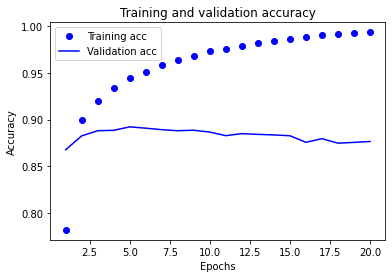

In [8]:
# This code is from the DLWP Book
def plot_acc():
    
    plt.clf()

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    
plot_acc()

The lowest validation loss for this model was a little less than 0.3% at around 6 epochs. After this, it increases and I can see some overfitting with this model. The highest validation accuracy for this model was around 89% at around 5 epochs. After this, it decreases slowly which suggest overfitting again.

The aim for this model was to achieve statistical power. This means achieving accuracy higher than the baseline. For this investigation the baseline is 50%. Therefore, this model was successful as it reached an accuracy of 89%

|    Model    |    Results    |
|--------|--------|
|    Baseline: 2 layers, 8,1 units    |     Highest loss: 0.3%, Highest accuracy: 89%, Some overfitting   |

### Scaling up: Making a model that overfits

The previous model did achieve statistical power, but it might not be powerful enough to model the problem to its best. To solve this, I will build a bigger model by increasing the hidden units to 16. This will cause the model to overfit. When the model begins to overfit, I can then stop the network and adjust the model and regularise it to resolve the overfitting. The number of epochs and batch size will remain the same.

In [10]:
# The model definition, adding layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

# Compiling the model with a loss function and an optimizer
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4886 - accuracy: 0.7936 - val_loss: 0.3901 - val_accuracy: 0.8585
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3050 - accuracy: 0.9053 - val_loss: 0.3143 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2376 - accuracy: 0.9249 - val_loss: 0.3065 - val_accuracy: 0.8797
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1947 - accuracy: 0.9410 - val_loss: 0.2776 - val_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1668 - accuracy: 0.9495 - val_loss: 0.2764 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1433 - accuracy: 0.9584 - val_loss: 0.3160 - val_accuracy: 0.8733
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1249 - accuracy: 0.9646 - val_loss: 0.2819 - val_accuracy: 0.8867
Epoch 8/20
30

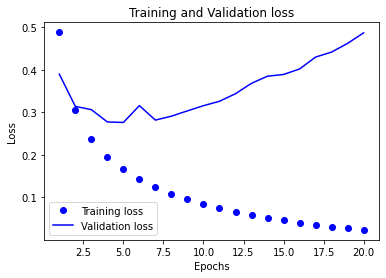

In [11]:
plot_loss()

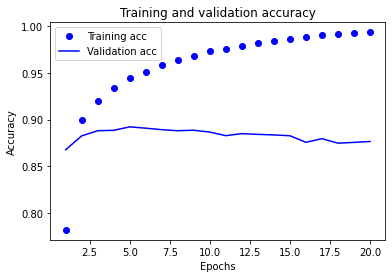

In [12]:
plot_acc()

This model had the lowest loss at just below 0.3% and the highest accuracy at around 88.9%. As expected this is very similar to the last model. However, this models loss drastically increases to 0.5% showing this model has experienced much more overfitting than the previous model.

|    Model    |    Results    |
|--------|--------|
|   #1 Baseline: 2 layers, 8,1 units    |     Lowest loss: 0.3%, Highest accuracy: 89%, Some overfitting   |
|    #2 Scaling up: 2 layers, 16,1 units    |    Lowest loss: 0.3%, Highest accuracy: 88.9%, Much more overfitting    |

### Regularizing the model and tuning hyperparameters

As there was a lot of overfitting in the previous model, it is required to implement regularization and tune model until the best model is found.

The first thing I will be doing is adding a new hyperparameter. A dropout layer. Dropout is one of the most effective regularisation techniques. Dropout will randomly drop out a number of output features of the layer during training. For example, during test time, the layers output values wil be scaled down by a factor equal to the dropout rate. The dropout rate is the fraction of the features that are dropped out.

I will be scaling the dropout by 0.5. I will be adding it between the Dense layers, in hopes it will reduce the overfitting.

In [13]:
# The model definition, adding layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

# Compiling the model with a loss function and an optimizer
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5601 - accuracy: 0.7379 - val_loss: 0.4400 - val_accuracy: 0.8599
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4033 - accuracy: 0.8522 - val_loss: 0.3620 - val_accuracy: 0.8760
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3349 - accuracy: 0.8832 - val_loss: 0.3229 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2889 - accuracy: 0.9012 - val_loss: 0.3052 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2524 - accuracy: 0.9167 - val_loss: 0.2844 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2297 - accuracy: 0.9257 - val_loss: 0.2769 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2078 - accuracy: 0.9339 - val_loss: 0.2800 - val_accuracy: 0.8889
Epoch 8/20
30

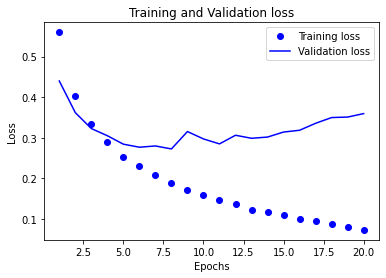

In [14]:
plot_loss()

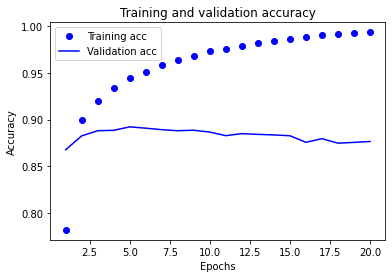

In [15]:
plot_acc()

This model has again performed very similar to the previous models. However, as you can see on the loss graph the overfitting has been reduced by quite a lot due to the dropout layer.

|    Model    |    Results    |
|--------|--------|
|   #1 Baseline: 2 layers, 8,1 units    |     Lowest loss: below 0.3%, Highest accuracy: 89%, Some overfitting   |
|    #2 Scaling up: 2 layers, 16,1 units    |    Lowest loss: below 0.3%, Highest accuracy: 88.9%, Much more overfitting    |
|    #3 Dropout(0.5): 3 layers, 16,1 units    |    Lowest loss: below 0.3%, Highest accuracy: 88.98%, Overfitting reduced     |

The next thing I am going to do is change the model architecture. I will be adding another dense layer with 16 units. This will increase the model complexity and could increase the accuracy.

In [16]:
# The model definition, adding layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# Compiling the model with a loss function and an optimizer
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5764 - accuracy: 0.7222 - val_loss: 0.4400 - val_accuracy: 0.8411
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4213 - accuracy: 0.8449 - val_loss: 0.3400 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3369 - accuracy: 0.8795 - val_loss: 0.3012 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2812 - accuracy: 0.9050 - val_loss: 0.2909 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2370 - accuracy: 0.9180 - val_loss: 0.2921 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2097 - accuracy: 0.9315 - val_loss: 0.2774 - val_accuracy: 0.8910
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1811 - accuracy: 0.9378 - val_loss: 0.2826 - val_accuracy: 0.8916
Epoch 8/20
30

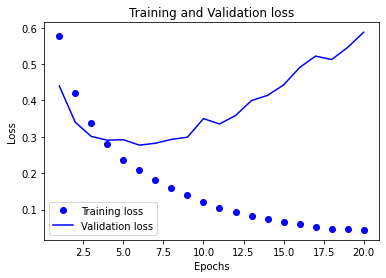

In [17]:
plot_loss()

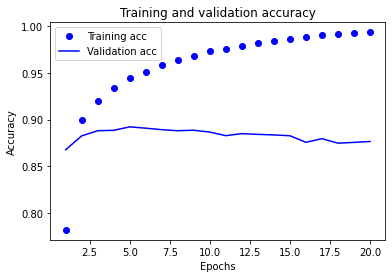

In [18]:
plot_acc()

It seems with this model the lowest loss has increased by hitting 0.3% at around 4 epochs. After this, the loss increases a lot again showing overfitting. The accuracy is higher but it is still very similar to the previous models

This shows to me that adding an extra layer doesnt provide much, as it has not increased the accuracy but it has increased overfitting in the loss. Therefore, I will not be adding an extra dense layer into my final model.

|    Model    |    Results    |
|--------|--------|
|   #1 Baseline: 2 layers, 8,1 units    |     Lowest loss: below 0.3%, Highest accuracy: 89%, Some overfitting   |
|    #2 Scaling up: 2 layers, 16,1 units    |    Lowest loss: below 0.3%, Highest accuracy: 88.9%, Much more overfitting    |
|    #3 Dropout(0.5): 3 layers, 16,1 units    |    Lowest loss: below 0.3%, Highest accuracy: 88.98%, Overfitting reduced     |
|    #4 Extra layer: 4 layers, 16,16,1 units    |    Lowest loss: 0.3%, Highest accuracy: 89.16%, High amount of overfitting    |

With this model, I will be adding another new hyperparameter. This will be L2 regularization. With L2 regularization, the cost added is proportional to the square of the value of the weight coefficients. To do this I will have to import regularizers.

In [21]:
from keras import regularizers

# The model definition, adding layers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

# Compiling the model with a loss function and an optimizer
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Training the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5778 - accuracy: 0.7374 - val_loss: 0.4710 - val_accuracy: 0.8388
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4370 - accuracy: 0.8518 - val_loss: 0.3923 - val_accuracy: 0.8801
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3750 - accuracy: 0.8804 - val_loss: 0.3640 - val_accuracy: 0.8823
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3455 - accuracy: 0.8922 - val_loss: 0.3443 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3228 - accuracy: 0.9023 - val_loss: 0.3359 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3056 - accuracy: 0.9108 - val_loss: 0.3369 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2925 - accuracy: 0.9167 - val_loss: 0.3285 - val_accuracy: 0.8875
Epoch 8/20
30

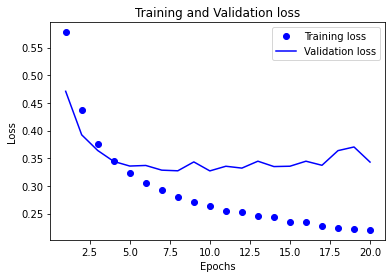

In [22]:
plot_loss()

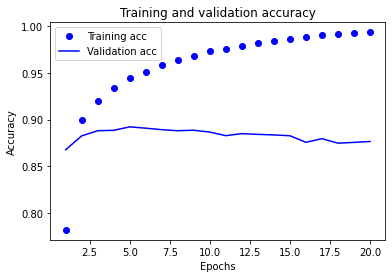

In [23]:
plot_acc()

With both the dropout layer and the l2 regularization, overfitting has been reduced by a lot. The accuracy is still similar with the previous models. Although the lowest loss has increased a bit, it is still consistent with the results of the other models

|    Model    |    Results    |
|--------|--------|
|   #1 Baseline: 2 layers, 8,1 units    |     Lowest loss: below 0.3%, Highest accuracy: 89%, Some overfitting   |
|    #2 Scaling up: 2 layers, 16,1 units    |    Lowest loss: below 0.3%, Highest accuracy: 88.9%, Much more overfitting    |
|    #3 Dropout(0.5): 3 layers, 16,1 units    |    Lowest loss: below 0.3%, Highest accuracy: 88.98%, Overfitting reduced     |
|    #4 Extra layer: 4 layers, 16,16,1 units    |    Lowest loss: 0.3%, Highest accuracy: 89.16%, High amount of overfitting    |
|    #5 l2: 3 layers, 16,1 units    |    Lowest loss: 0.33%, Highest accuracy: 88.95%, Overfitting reduced by a lot    |

I will stop with the iterations there. Anymore iterations will increase the chances of information leaking between the validation and training sets which will result in unreliable results.

## Results

Throughout all of the models, the overfitting started at around 8 epochs. So for this new model I will only train it for 8 epochs.

Since this is the final model, I will be training it with all of the training data and I will be evaluating it with the test data.

In [4]:
from keras import regularizers

# The model definition, adding layers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

# Compiling the model with a loss function and an optimizer
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Training the model on all of the training data
model.fit(x_train, y_train, epochs = 11, batch_size = 512)

# Evaluating with test data
results = model.evaluate(x_test, y_test)

Epoch 1/11
49/49 [==============================] - 2s 29ms/step - loss: 0.5194 - accuracy: 0.7849
Epoch 2/11
49/49 [==============================] - 1s 28ms/step - loss: 0.3845 - accuracy: 0.8714
Epoch 3/11
49/49 [==============================] - 1s 29ms/step - loss: 0.3400 - accuracy: 0.8892
Epoch 4/11
49/49 [==============================] - 1s 28ms/step - loss: 0.3163 - accuracy: 0.8987
Epoch 5/11
49/49 [==============================] - 1s 28ms/step - loss: 0.3042 - accuracy: 0.9073
Epoch 6/11
49/49 [==============================] - 1s 29ms/step - loss: 0.2893 - accuracy: 0.9122
Epoch 7/11
49/49 [==============================] - 1s 28ms/step - loss: 0.2832 - accuracy: 0.9162
Epoch 8/11
49/49 [==============================] - 1s 29ms/step - loss: 0.2741 - accuracy: 0.9196
Epoch 9/11
49/49 [==============================] - 1s 28ms/step - loss: 0.2691 - accuracy: 0.9215
Epoch 10/11
49/49 [==============================] - 1s 28ms/step - loss: 0.2632 - accuracy: 0.9249
Epoch 11/

The final model has achieved 0.3% loss and 88.46% accuracy on the whole dataset, wihch has been the same through the other models aswell with the validation sets. This proves that the network has been trained correctly.

## Conclusion

Throughout this investigation, multiple models were created to identify a final optimum model, that can efficiently solve this problem with the IMDB dataset.

The hypotheses that were made during this investigation:

 - The output can be predicted given the inputs
 
 - The available data is sufficiently informative to learn the relationship 

My results have proven these hypotheses because when the model was evaluated against the unseen test dataset, the results were as consistent as when it was evaluated with the validation/training sets. This shows that the outputs can be predicted from the inputs. This has also proved that the evaluated method I chose was the correct one as I did not have to change to another, such s K-fold validation.

If I was able to iterate the model more times, I would have experimented with the tanh activation, as well as experimented with a higher unit count.

But even without these, the experiment has proven to be successful.